In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
population = pd.read_csv('population.csv',delimiter=';').drop(['Unnamed: 2','Unnamed: 3'],axis=1)

In [9]:
population.sort_values('region').head()

,population,region
0,1181860.0,Cherkasy
1,980290.0,Chernihiv
2,897922.0,Chernivtsi
4,3150407.0,Dnipropetrovs'k
5,4106841.0,Donets'k


In [10]:
fp = "UKR_adm/UKR_adm1.shp"
map_df = gpd.read_file(fp)

In [11]:
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,240,UKR,Ukraine,1,Cherkasy,Oblast',Region,None,Cherkas'ka Oblast'|Cherkasskaya Oblast'|Cherkassy,"POLYGON ((32.15047 50.19769, 32.15050 50.19181..."
1,240,UKR,Ukraine,2,Chernihiv,Oblast',Region,None,Chernigov|Tschernigow,"POLYGON ((33.19667 52.37500, 33.20612 52.36700..."
2,240,UKR,Ukraine,3,Chernivtsi,Oblast',Region,None,Chernivets'ka Oblast'|Chernovitskaya Oblast'|C...,"POLYGON ((25.62595 48.67673, 25.64460 48.67159..."
3,240,UKR,Ukraine,4,Crimea,Autonomous Republic,Autonomous Republic,None,Crimée|Criméia|Krim|Krymskaya Respublika|Respu...,"MULTIPOLYGON (((33.79458 44.39153, 33.79291 44..."
4,240,UKR,Ukraine,5,Dnipropetrovs'k,Oblast',Region,None,Dnipropetrovsk|Dniepropietrovsk|Dnjepropetrowsk,"POLYGON ((34.92995 49.15574, 34.92076 49.14992..."


In [12]:
population_full = map_df.merge(population,left_on='NAME_1',right_on='region')

In [ ]:
# plt.rcParams['figure.figsize'] = [15, 20] #height, width
# map_df.plot()

<AxesSubplot:>

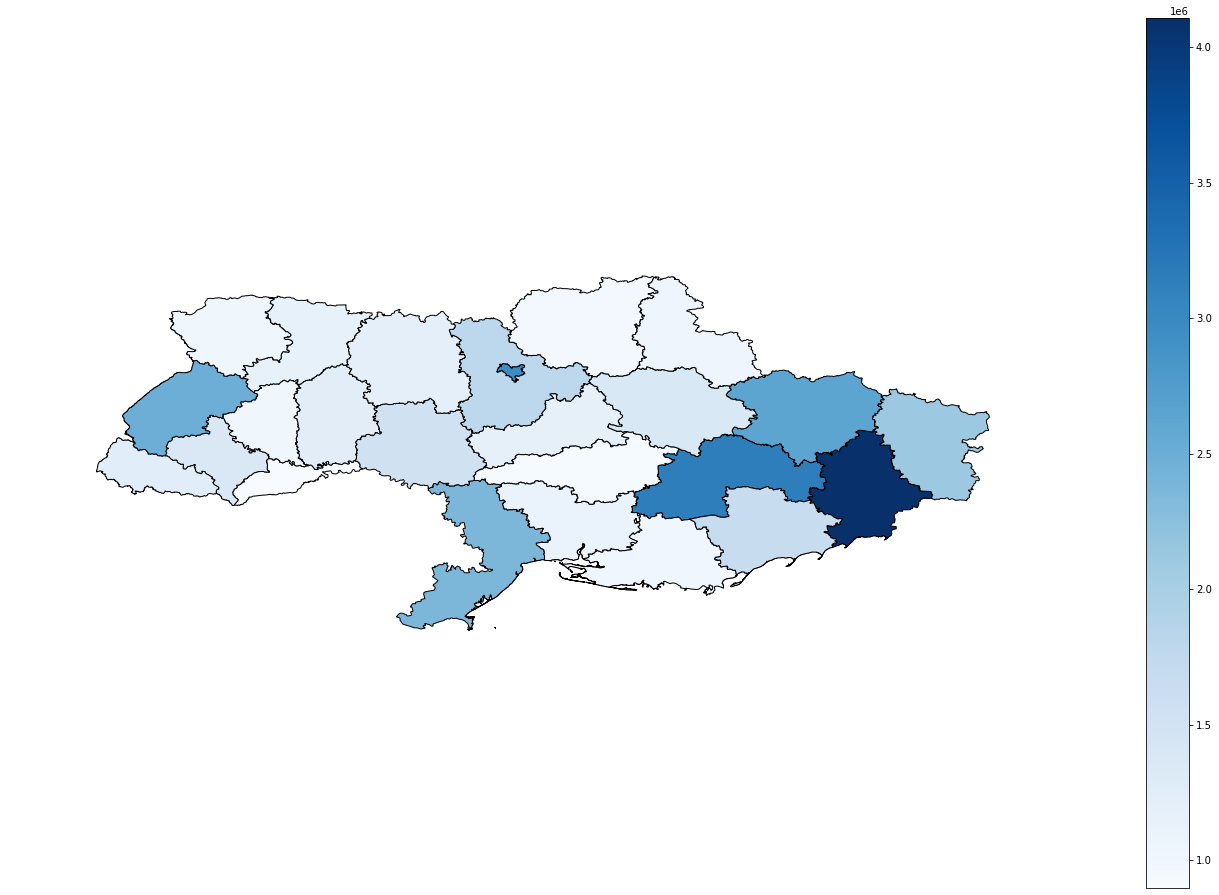

In [21]:
import mapclassify
import geoplot

geoplot.choropleth(
    population_full, hue='population',
    cmap='Blues', figsize=(24,16), legend=True
)

In [25]:
population_full.sort_values('population').head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,population,region
2,240,UKR,Ukraine,3,Chernivtsi,Oblast',Region,None,Chernivets'ka Oblast'|Chernovitskaya Oblast'|C...,"POLYGON ((25.62595 48.67673, 25.64460 48.67159...",897922.0,Chernivtsi
11,240,UKR,Ukraine,13,Kirovohrad,Oblast',Region,None,Kirovograd|Kirovogradskaya Oblast',"POLYGON ((32.95085 49.20770, 32.96899 49.20749...",923254.0,Kirovohrad
1,240,UKR,Ukraine,2,Chernihiv,Oblast',Region,None,Chernigov|Tschernigow,"POLYGON ((33.19667 52.37500, 33.20612 52.36700...",980290.0,Chernihiv
7,240,UKR,Ukraine,9,Kherson,Oblast',Region,None,Cherson|Khersons'ka Oblast',"MULTIPOLYGON (((34.05688 46.01227, 34.05639 46...",1019829.0,Kherson
22,240,UKR,Ukraine,25,Volyn,Oblast',Region,None,Volhynia|Volyns'ka Oblast'|Volynskaya Oblast'|...,"POLYGON ((25.30289 51.97861, 25.32052 51.97417...",1028781.0,Volyn
